<img src="../Udacity_DL_Nanodegree/031%20RNN%20Super%20Basics/SimpleRNN01.png" align="left"/>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [2]:
# Encoding: 'a'=[0,0,1] 'b'=[0,1,0] 'c'=[1,0,0]

#                            < ----- 4x time steps ----- >
x_train = np.array([    
                    [ [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0] ],  #  'bbcb'
                    [ [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0] ],  #  'cbcb'   ^
                    [ [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0] ],  #  'bcbc'   ^
                    [ [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0] ],  #  'cbbc'   ^
                    [ [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0] ],  #  'ccbc'   ^
    
    
                    [ [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0] ],  #  'bacb'   | 9x batch size
                    [ [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1] ],  #  'ccba'   v
                    [ [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0] ],  #  'acbc'   ^
                    [ [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0] ],  #  'cbac'   ^
                    
                    [ [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0] ],  #  'baab'
                    [ [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0] ],  #  'aabc'
    
                    [ [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1] ],  #  'acaa'
                   ])
y_train = np.array([ [0],   # <->  no timesteps
                     [0],   #
                     [0],   #
                     [0],   #
                     [0],   #
                    
                     [1],   #  ^
                     [1],   #  |  9x batch size
                     [1],   #  ^
                     [1],   #  |  9x batch size
                    
                     [0],   #  v
                     [0],   #
                    
                     [1] ]) #
x_test = np.array([
                   [ [0,1,0], [1,0,0], [1,0,0], [0,1,0] ],  #  'bccb' -> 0
                   [ [1,0,0], [1,0,0], [0,1,0], [1,0,0] ],  #  'ccbb' -> 0
                   [ [0,1,0], [1,0,0], [0,0,1], [1,0,0] ],  #  'bcac' -> 1
                   [ [0,1,0], [0,0,1], [1,0,0], [0,1,0] ],  #  'bacb' -> 1
                  ])

In [3]:
x_int = np.random.choice(3, size=10)

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_der(x):
    return 1.0 - np.tanh(x)**2

In [5]:
def fwd(x, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
    x_t4 = x[:,3,:]
        
    s_t0 = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    z_t1 = s_t0 @ Whh + x_t1 @ Wxh
    s_t1 = tanh(z_t1)
    z_t2 = s_t1 @ Whh + x_t2 @ Wxh
    s_t2 = tanh(z_t2)
    z_t3 = s_t2 @ Whh + x_t3 @ Wxh
    s_t3 = tanh(z_t3)
    z_t4 = s_t3 @ Whh + x_t4 @ Wxh
    s_t4 = tanh(z_t4)
    z_out = s_t4 @ Who
    y_hat = sigmoid( z_out )
    
    return y_hat

In [33]:
def fwd(x, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    
    x_t = {}
    
    for t in range(1, x.shape[1]+1):
        print(t)
        
        x_t[t] = x[:,]
    
    x_t0 = x[:,0,:]
    x_t1 = x[:,1,:]
    x_t2 = x[:,2,:]
    x_t3 = x[:,3,:]
        
    s_init = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    z_t0 = s_init @ Whh + x_t0 @ Wxh
    s_t0 = tanh(z_t0)
    z_t1 = s_t0 @ Whh + x_t1 @ Wxh
    s_t1 = tanh(z_t1)
    z_t2 = s_t1 @ Whh + x_t2 @ Wxh
    s_t2 = tanh(z_t2)
    z_t3 = s_t2 @ Whh + x_t3 @ Wxh
    s_t3 = tanh(z_t3)
    z_out = s_t3 @ Who
    y_hat = sigmoid( z_out )
    
    return y_hat

In [24]:
def back(x, y, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    assert y.ndim==2 and y.shape[1:]==(1,)
    assert len(x) == len(y)
    
    # Forward
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
    x_t4 = x[:,3,:]
        
    s_t0 = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    z_t1 = s_t0 @ Whh + x_t1 @ Wxh
    s_t1 = tanh(z_t1)
    z_t2 = s_t1 @ Whh + x_t2 @ Wxh
    s_t2 = tanh(z_t2)
    z_t3 = s_t2 @ Whh + x_t3 @ Wxh
    s_t3 = tanh(z_t3)
    z_t4 = s_t3 @ Whh + x_t4 @ Wxh
    s_t4 = tanh(z_t4)
    z_out = s_t4 @ Who
    y_hat = sigmoid( z_out )
    
    # Backward
    dWxh = np.zeros_like(Wxh)
    dWhh = np.zeros_like(Whh)
    dWho = np.zeros_like(Who)
    
    err = -(y-y_hat)/len(x) * sigmoid_der( z_out )
    #err /= len(x)
    dWho = s_t4.T @ err

    ro_t4 = err @ Who.T * tanh_der(z_t4)
    dWxh += x_t4.T @ ro_t4
    dWhh += s_t3.T @ ro_t4
    
    ro_t3 = ro_t4 @ Whh.T * tanh_der(z_t3)
    dWxh += x_t3.T @ ro_t3
    dWhh += s_t2.T @ ro_t3
    
    ro_t2 = ro_t3 @ Whh.T * tanh_der(z_t2)
    dWxh += x_t2.T @ ro_t2
    dWhh += s_t1.T @ ro_t2
    
    ro_t1 = ro_t2 @ Whh.T * tanh_der(z_t1)
    dWxh += x_t1.T @ ro_t1
    dWhh += s_t0.T @ ro_t1
#     ro_t1 = ro_t2 @ Whh.T              # [n_batch, n_hid]
#     dWxh += x_t1.T @ ro_t1
#     dWhh += s_t0.T @ ro_t1           # [n_hid, n_hid]
    
    return y_hat, dWxh, dWhh, dWho

In [7]:
def mse(x, y, Wxh, Whh, Who):
    y_hat = fwd(x, Wxh, Whh, Who)
    return 0.5 * np.mean((y-y_hat)**2)

#### Train

In [8]:
np.random.seed(0)
W_xh = 0.1 * np.random.randn(3, 2)  # Wxh.shape: [n_in, n_hid]
W_hh = 0.1 * np.random.randn(2, 2)  # Whh.shape: [n_hid, n_hid]
W_ho = 0.1 * np.random.randn(2, 1)  # Who.shape: [n_hid, n_out]

In [9]:
def train_rnn(x, y, nb_epochs, learning_rate, Wxh, Whh, Who):
    
    losses = []
    
    for e in range(nb_epochs):
        
        y_hat, dWxh, dWhh, dWho = back(x, y, Wxh, Whh, Who)
        
        Wxh += -learning_rate * dWxh
        Whh += -learning_rate * dWhh
        Who += -learning_rate * dWho
        
        # Log and print
        loss_train = mse(x, y, Wxh, Whh, Who)
        losses.append(loss_train)
        if e % (nb_epochs / 10) == 0:
            print('loss ', loss_train.round(4))
        
    return losses
        

In [13]:
losses = train_rnn(x_train, y_train, 1000, 0.1, W_xh, W_hh, W_ho)

loss  0.0545
loss  0.0469
loss  0.0381
loss  0.0293
loss  0.0217
loss  0.0159
loss  0.0119
loss  0.0092
loss  0.0074
loss  0.0061


In [34]:
fwd(x_train, W_xh, W_hh, W_ho).round(0)

1
2
3
4


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [15]:
fwd(x_test, W_xh, W_hh, W_ho).round(0)

array([[0.],
       [0.],
       [1.],
       [1.]])

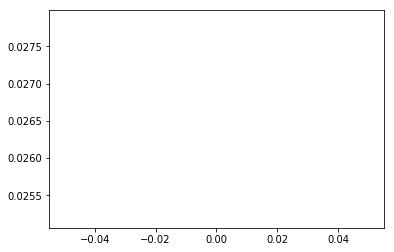

In [196]:
plt.plot(losses)

#### Test Grad

In [31]:
# test backward
_, dW_xh, dW_hh, dW_ho = back(x_train, y_train, W_xh, W_hh, W_ho)
print('dW_xh', dW_xh)
print('dW_hh', dW_hh)
print('dW_ho', dW_ho)

dW_xh [[-0.00141006 -0.00181138]
 [-0.00222526 -0.00256484]
 [-0.0006515   0.00162391]]
dW_hh [[ 0.00050641  0.00406317]
 [-0.00127919 -0.00321661]]
dW_ho [[0.00022729]
 [0.00575002]]


In [26]:
# test numerical gradient
ngW_xh, ngW_hh, ngW_ho = ngrad(x_train, y_train, W_xh, W_hh, W_ho)
print('ngW_xh', ngW_xh)
print('ngW_hh', ngW_hh)
print('ngW_ho', ngW_ho)

ngW_xh [[-0.00141006 -0.0018114 ]
 [-0.00222526 -0.00256484]
 [-0.0006515   0.00162391]]
ngW_hh [[ 0.00050641  0.00406316]
 [-0.00127919 -0.00321661]]
ngW_ho [[0.00022729]
 [0.00575002]]


In [27]:
assert np.allclose(dW_xh, ngW_xh)
assert np.allclose(dW_hh, ngW_hh)
assert np.allclose(dW_ho, ngW_ho)

In [18]:
def ngrad(x, y, Wxh, Whh, Who):
    dWxh = np.zeros_like(Wxh)
    dWhh = np.zeros_like(Whh)
    dWho = np.zeros_like(Who)
    eps = 1e-4
    
    for r in range(len(Wxh)):
        for c in range(Wxh.shape[1]):
            Wxh_pls = Wxh.copy()
            Wxh_min = Wxh.copy()
            
            Wxh_pls[r, c] += eps
            Wxh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh_pls, Whh, Who)
            l_min = mse(x, y, Wxh_min, Whh, Who)
            
            dWxh[r, c] = (l_pls - l_min) / (2*eps)
    
    for r in range(len(Whh)):
        for c in range(Whh.shape[1]):
            Whh_pls = Whh.copy()
            Whh_min = Whh.copy()
            
            Whh_pls[r, c] += eps
            Whh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh, Whh_pls, Who)
            l_min = mse(x, y, Wxh, Whh_min, Who)
            
            dWhh[r, c] = (l_pls - l_min) / (2*eps)
    
    for r in range(len(Who)):
        for c in range(Who.shape[1]):
            Who_pls = Who.copy()
            Who_min = Who.copy()
            
            Who_pls[r, c] += eps
            Who_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh, Whh, Who_pls)
            l_min = mse(x, y, Wxh, Whh, Who_min)
            
            dWho[r, c] = (l_pls - l_min) / (2*eps)
    
    
    return dWxh, dWhh, dWho

# [n_batch, n_time, n_in] - this works

In [47]:
train_x = np.array([[[1], [0], [0]],    # dim-0 is training examples in batch - here T=5
                    [[0], [1], [0]],    # dim-1 is across time steps - here 3
                    [[1], [1], [0]],    # dim-2 is width of features vector - here 1
                    [[1], [0], [1]],
                    [[1], [1], [1]]], dtype=np.float64)
train_y = np.array([[1],                # we ignore time steps, thus only 2 dimensions
                    [1],
                    [2],
                    [2],
                    [3]], dtype=np.float64)

W_hh = np.array([[1]], dtype=np.float64)  # correct answer is W_hh == [[1]]
W_xh = np.array([[1]], dtype=np.float64)  # correct answer is W_xh == [[1]]

In [48]:
def fwd(x, Wxh, Whh):
    assert x.ndim==3 and x.shape[1:]==(3, 1)
    
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
        
    s0 = np.zeros([len(x), 1])   # [batch_size, nb_state_neurons]
    s1 = s0 @ Whh + x_t1 @ Wxh
    s2 = s1 @ Whh + x_t2 @ Wxh
    s3 = s2 @ Whh + x_t3 @ Wxh
    y_hat = s3
    return y_hat

In [94]:
def back(x, y, Wxh, Whh):
    assert x.ndim==3 and x.shape[1:]==(3, 1)
    assert y.ndim==2 and y.shape[1:]==(1,)
    
    # Forward
    s0 = np.zeros([len(x), 1])   # [n_batch, n_hid]
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
    s1 = s0 @ Whh + x_t1 @ Wxh
    s2 = s1 @ Whh + x_t2 @ Wxh
    s3 = s2 @ Whh + x_t3 @ Wxh
    y_hat = s3
    
    # Backward Whh
    err = (y-y_hat)
    der_t1 = s0
    der_t2 = der_t1 @ Whh + s1
    der_t3 = der_t2 @ Whh + s2
    dWhh = -np.sum(err * der_t3, keepdims=True) / len(x)
    
    # Backward Wxh
    der_t1 = x_t1
    der_t2 = der_t1 @ Whh + x_t2
    der_t3 = der_t2 @ Whh + x_t3
    dWxh = -np.sum(err * der_t3, keepdims=True) / len(x)
    
    return dWxh, dWhh

In [104]:
def back_2(x, y, Wxh, Whh):
    
    # Forward
    s0 = np.zeros([len(x), 1])   # [n_batch, n_hid]
    x_t1 = x[:,0,:]
    x_t2 = x[:,1,:]
    x_t3 = x[:,2,:]
    s1 = s0 @ Whh + x_t1 @ Wxh
    s2 = s1 @ Whh + x_t2 @ Wxh
    s3 = s2 @ Whh + x_t3 @ Wxh
    y_hat = s3
    
    
    # Backward
    dWxh = np.zeros_like(Wxh)
    dWhh = np.zeros_like(Whh)
    
    ro3 = -(y-y_hat) / len(x)    # [n_batch, n_hid]
    dWxh += x_t3.T @ ro3
    dWhh += s2.T @ ro3           # [n_hid, n_hid]
    
    ro2 = ro3 @ Whh.T              # [n_batch, n_hid]
    dWxh += x_t2.T @ ro2
    dWhh += s1.T @ ro2           # [n_hid, n_hid]
    
    ro1 = ro2 @ Whh.T              # [n_batch, n_hid]
    dWxh += x_t1.T @ ro1
    dWhh += s0.T @ ro1           # [n_hid, n_hid]
    
    return dWxh, dWhh
    

In [76]:
def mse(x, y, Wxh, Whh):
    y_hat = fwd(x, Wxh, Whh)
    return 0.5 * np.mean((y-y_hat)**2)

#### Test

In [100]:
W_hh = np.array([[0.95]], dtype=np.float64)  # correct answer is W_hh == [[1]]
W_xh = np.array([[0.95]], dtype=np.float64)  # correct answer is W_xh == [[1]]

In [101]:
fwd(train_x, W_xh, W_hh)

array([[0.857375],
       [0.9025  ],
       [1.759875],
       [1.807375],
       [2.709875]])

**back check**

In [102]:
dW_xh, dW_hh = back(train_x, train_y, W_xh, W_hh)
print('dW_xh', dW_xh)
print('dW_hh', dW_hh)

dW_xh [[-0.37204525]]
dW_hh [[-0.431718]]


**back_2 check**

In [105]:
dW_xh, dW_hh = back_2(train_x, train_y, W_xh, W_hh)
print('dW_xh', dW_xh)
print('dW_hh', dW_hh)

dW_xh [[-0.37204525]]
dW_hh [[-0.431718]]


**ngrad check**

In [98]:
dW_xh, dW_hh = ngrad(train_x, train_y, W_xh, W_hh)
print('dW_xh', dW_xh)
print('dW_hh', dW_hh)

dW_xh [[-0.37204525]]
dW_hh [[-0.43171798]]


#### Numerical Gradient

In [51]:
def ngrad(x, y, Wxh, Whh):
    dWhh = np.zeros_like(Whh)
    dWxh = np.zeros_like(Wxh)
    eps = 1e-4
    
    for r in range(len(Whh)):
        for c in range(Whh.shape[1]):
            Whh_pls = Whh.copy()
            Whh_min = Whh.copy()
            
            Whh_pls[r, c] += eps
            Whh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh, Whh_pls)
            l_min = mse(x, y, Wxh, Whh_min)
            
            dWhh[r, c] = (l_pls - l_min) / (2*eps)
            
    for r in range(len(Wxh)):
        for c in range(Wxh.shape[1]):
            Wxh_pls = Wxh.copy()
            Wxh_min = Wxh.copy()
            
            Wxh_pls[r, c] += eps
            Wxh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh_pls, Whh)
            l_min = mse(x, y, Wxh_min, Whh)
            
            dWxh[r, c] = (l_pls - l_min) / (2*eps)
    
    return dWxh, dWhh

# Tensorflow test

In [3]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    pass

In [12]:
tf.reset_default_graph()

n_in = 2
n_out = 1

X = tf.placeholder(dtype=tf.float32, shape=[None, n_in])
Y = tf.placeholder(dtype=tf.float32, shape=[None, n_out])

W = tf.get_variable(name='W', shape=[n_in, n_out])
b = tf.get_variable(name='b', shape=[1, n_out])

z = tf.matmul(X, W) + b
y_hat = tf.sigmoid(z)

loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=Y, logits=z)

writer = tf.summary.FileWriter('tf_log', graph=tf.get_default_graph())
writer.flush()


In [6]:
n_a = 64       # 64 hidden units
n_values = 78  # nb notes
Tx = 30        # audio chunk size (nb time steps)

In [5]:
reshapor = tf.keras.layers.Reshape([1, 78])                        # one hot vector
LSTM_cell = tf.keras.layers.LSTM(n_a, return_state = True)         # Used in Step 2.C
densor = tf.keras.layers.Dense(n_values, activation='softmax')     # Used in Step 2.D

In [7]:
X = tf.keras.layers.Input(shape=[Tx, n_values])   # shape: [n_batch, n_time, n_in]

In [9]:
X

<tf.Tensor 'input_1:0' shape=(?, 30, 78) dtype=float32>

In [ ]:
tf.keras.layers.Lambda()